# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [71]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [72]:
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [73]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
            



Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : katsuura
Processing Record 2 of Set 1 : rikitea
Processing Record 3 of Set 1 : iqaluit
Processing Record 4 of Set 1 : ribeira grande
Processing Record 5 of Set 1 : kloulklubed
Processing Record 6 of Set 1 : punta arenas
City not found. Skipping...
Processing Record 7 of Set 1 : torbay
Processing Record 8 of Set 1 : sumbawanga
Processing Record 9 of Set 1 : pevek
Processing Record 10 of Set 1 : arraial do cabo
Processing Record 11 of Set 1 : salta
Processing Record 12 of Set 1 : mehamn
City not found. Skipping...
Processing Record 13 of Set 1 : hilo
Processing Record 14 of Set 1 : svetlogorsk
Processing Record 15 of Set 1 : hermanus
Processing Record 16 of Set 1 : bonthe
Processing Record 17 of Set 1 : pouebo
Processing Record 18 of Set 1 : ambon
Processing Record 19 of Set 1 : sambava
Processing Record 20 of Set 1 : salinopolis
City not found. Skipping...
Processing Record 21 of Set 1 : dikson
Proces

Processing Record 41 of Set 4 : rajanpur
Processing Record 42 of Set 4 : esperance
Processing Record 43 of Set 4 : te anau
Processing Record 44 of Set 4 : were ilu
Processing Record 45 of Set 4 : pitimbu
Processing Record 46 of Set 4 : sangar
Processing Record 47 of Set 4 : sharjah
Processing Record 48 of Set 4 : moron
Processing Record 49 of Set 4 : hamilton
City not found. Skipping...
City not found. Skipping...
Processing Record 50 of Set 4 : rio gallegos
Processing Record 1 of Set 5 : lagoa
Processing Record 2 of Set 5 : puerto ayora
Processing Record 3 of Set 5 : saint-georges
Processing Record 4 of Set 5 : kipini
Processing Record 5 of Set 5 : surin
Processing Record 6 of Set 5 : nanortalik
Processing Record 7 of Set 5 : tashtyp
Processing Record 8 of Set 5 : costinesti
Processing Record 9 of Set 5 : kirovskiy
Processing Record 10 of Set 5 : north bend
Processing Record 11 of Set 5 : falun
Processing Record 12 of Set 5 : hami
Processing Record 13 of Set 5 : san policarpo
Processi

Processing Record 32 of Set 8 : abu kamal
Processing Record 33 of Set 8 : kisangani
Processing Record 34 of Set 8 : trincomalee
Processing Record 35 of Set 8 : lakes entrance
Processing Record 36 of Set 8 : vizinga
Processing Record 37 of Set 8 : ulladulla
Processing Record 38 of Set 8 : sisimiut
Processing Record 39 of Set 8 : sadat
Processing Record 40 of Set 8 : libenge
Processing Record 41 of Set 8 : nizhnevartovsk
City not found. Skipping...
City not found. Skipping...
Processing Record 42 of Set 8 : ixtapa
Processing Record 43 of Set 8 : quatre cocos
Processing Record 44 of Set 8 : rapid valley
Processing Record 45 of Set 8 : shaunavon
Processing Record 46 of Set 8 : oranjemund
City not found. Skipping...
Processing Record 47 of Set 8 : saint anthony
Processing Record 48 of Set 8 : de aar
Processing Record 49 of Set 8 : old town
Processing Record 50 of Set 8 : moose jaw
Processing Record 1 of Set 9 : ylojarvi
Processing Record 2 of Set 9 : tazovskiy
Processing Record 3 of Set 9 :

Processing Record 15 of Set 12 : muros
Processing Record 16 of Set 12 : voronovytsya
Processing Record 17 of Set 12 : college
Processing Record 18 of Set 12 : belmonte
Processing Record 19 of Set 12 : jabbeke
Processing Record 20 of Set 12 : farim
Processing Record 21 of Set 12 : waddan
Processing Record 22 of Set 12 : porto novo
Processing Record 23 of Set 12 : perth
Processing Record 24 of Set 12 : beloha
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [77]:
weather_dict = pd.DataFrame({ 
                "City" : city_list,
                "Cloudiness" : cloud_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})


In [78]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Katsuura,20,JP,1597176503,83,35.13,140.30,82.40,17.22
1,Rikitea,100,PF,1597176503,68,-23.12,-134.97,71.24,19.89
2,Iqaluit,40,CA,1597176208,26,63.75,-68.51,59.00,14.99
3,Ribeira Grande,20,PT,1597176503,53,38.52,-28.70,75.20,8.05
4,Kloulklubed,1,PW,1597176503,70,7.04,134.26,83.79,3.27
...,...,...,...,...,...,...,...,...,...
580,Farim,94,GW,1597176572,90,12.48,-15.22,77.88,7.07
581,Waddān,11,LY,1597176572,32,29.16,16.14,87.85,21.99
582,Porto-Novo,20,BJ,1597176572,88,6.50,2.60,77.00,5.82
583,Perth,75,AU,1597176525,93,-31.93,115.83,55.99,11.03


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [79]:
humidity_100 = weather_dict.loc[weather_dict['Humidity']>100]
humidity_100

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [47]:
# no cities with humidity > 100 - Skip

In [48]:
#  Get the indices of cities that have humidity over 100%.
#skip

In [49]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#skip

In [9]:
# Extract relevant fields from the data frame
#Skip
# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

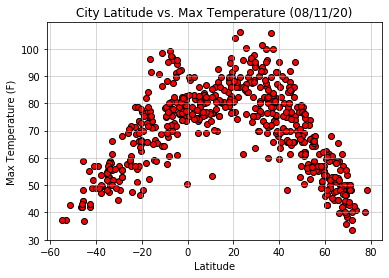

In [80]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "red", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (08/11/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

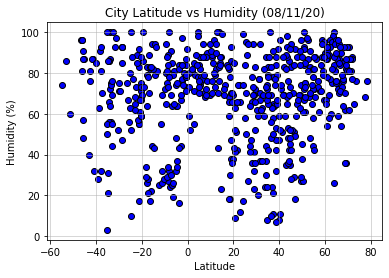

In [81]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs Humidity (08/11/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

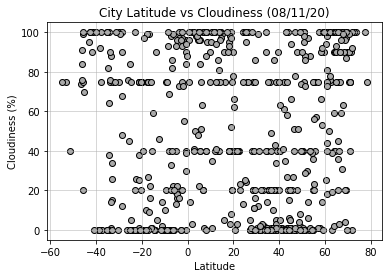

In [82]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "darkgrey", edgecolor = "black")

# Set title
plt.title("City Latitude vs Cloudiness (08/11/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

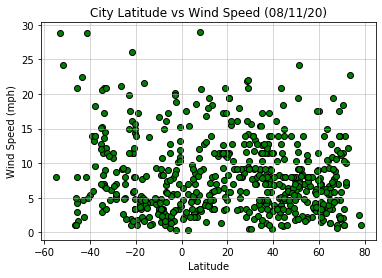

In [83]:
# Create Latitude vs. Wind Speed Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "green", edgecolor = "black")

# Set title
plt.title("City Latitude vs Wind Speed (08/11/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (mph)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [94]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [95]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
Northern_Hemisphere


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Katsuura,20,JP,1597176503,83,35.13,140.30,82.40,17.22
2,Iqaluit,40,CA,1597176208,26,63.75,-68.51,59.00,14.99
3,Ribeira Grande,20,PT,1597176503,53,38.52,-28.70,75.20,8.05
4,Kloulklubed,1,PW,1597176503,70,7.04,134.26,83.79,3.27
6,Torbay,20,CA,1597176314,65,47.67,-52.73,78.80,13.87
...,...,...,...,...,...,...,...,...,...
577,College,75,US,1597176571,76,64.86,-147.80,57.99,1.32
579,Jabbeke,73,BE,1597176571,73,51.19,3.10,75.99,9.17
580,Farim,94,GW,1597176572,90,12.48,-15.22,77.88,7.07
581,Waddān,11,LY,1597176572,32,29.16,16.14,87.85,21.99


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.74


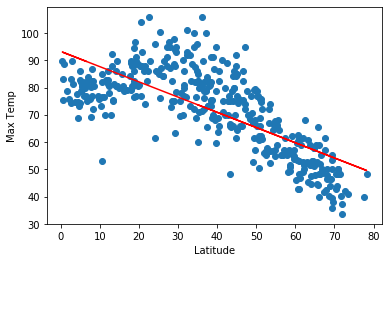

In [112]:
#Call Function
equation = linear_regression(Northern_Hemisphere["Lat"], Northern_Hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.8


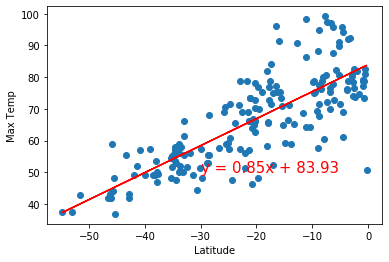

In [113]:
south_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]
south_hemisphere
# Call function #1
equation = linear_regression(south_hemisphere["Lat"],south_hemisphere["Max Temp"])

# Call function #2
annotate(equation, -30, 50)

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.09


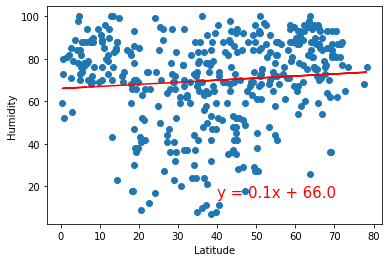

In [114]:
# Call function #1
equation = linear_regression(Northern_Hemisphere["Lat"],Northern_Hemisphere["Humidity"])

# Call function #2
annotate(equation, 40, 15)

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.12


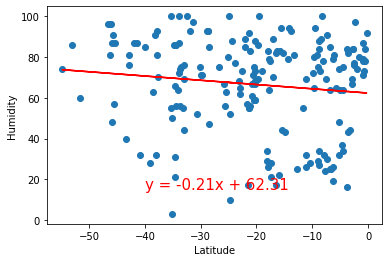

In [115]:
south_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]
south_hemisphere
# Call function #1
equation = linear_regression(south_hemisphere["Lat"],south_hemisphere["Humidity"])

# Call function #2
annotate(equation, -40, 15)

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

# Save the png
plt.savefig("../Images/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.01


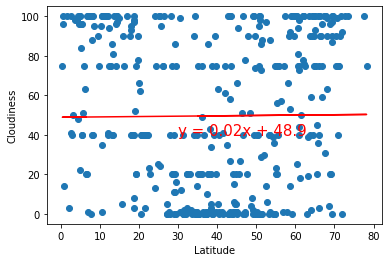

In [116]:
 #Call function #1
equation = linear_regression(Northern_Hemisphere["Lat"],Northern_Hemisphere["Cloudiness"])

# Call function #2
annotate(equation, 30, 40)

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.15


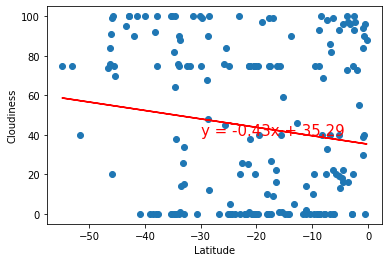

In [117]:
# Call function #1
equation = linear_regression(south_hemisphere["Lat"],south_hemisphere["Cloudiness"])

# Call function #2
annotate(equation, -30, 40)

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")

# Save the png
plt.savefig("../Images/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.1


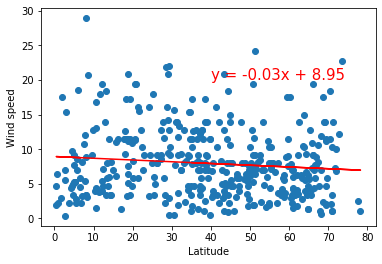

In [118]:
# Call function #1
equation = linear_regression(Northern_Hemisphere["Lat"],Northern_Hemisphere["Wind Speed"])

# Call function #2
annotate(equation, 40,20)

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind speed")

# Save the png
plt.savefig("../Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.24


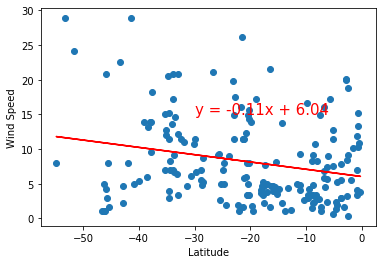

In [119]:
# Call function #1
equation = linear_regression(south_hemisphere["Lat"],south_hemisphere["Wind Speed"])

# Call function #2
annotate(equation, -30, 15)

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")

# Save the png
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")